![](https://blog.imarticus.org/wp-content/uploads/2020/09/shutterstock_623290838.jpg)



<h2>   
      <font color = blue >
            <span style='font-family:Georgia'>
            Table of Contents:
            </span>   
        </font>    
</h2>
<span style='font-family:Georgia'>
    <ol>
        <li><a href='#intro'>Introduction</a></li>
        <li><a href='#libraries'>Getting Jupyter Ready</a></li>
        <li><a href='#import'>Reading & Understanding the data</a></li>
        <ol>
            <li><a href='#input'>Importing the input files</a></li>
            <li><a href='#inspect'>Inspect Data Frames</a></li>
        </ol>
        <li><a href='#clean'>Data Cleaning & Manipulation</a></li>
        <ol>
            <li><a href='#fix'>Fixing rows and column</a></li>
            <li><a href='#null'>Null Value Calculation</a></li>
            <li><a href='#clean'>Analyze & Delete irrelevant Columns in LoanDF</a></li>
            <li><a href='#dconv'>Data Type Conversion</a></li>
            <li><a href='#outlier'>Identifying the outliers</a></li>
            <li><a href='#stdval'>Standardize Values</a></li>
        </ol>
        <li><a href='#analysis'>Data Analysis</a></li>

<a id="intro"></a>
<h2>   
      <font color = blue >
            <span style='font-family:Georgia'>
            1. Introduction:
            </span>   
        </font>    
</h2>

<h3 >   
      <font color = purple >
            <span style='font-family:Georgia'>
            Introduction:
            </span>   
        </font>    
</h3>
<p>
    <span style='font-family:Georgia'>
    This case study aims to give an idea of applying EDA in a real business scenario. In this case study, we will develop a basic understanding of risk analytics in banking and financial services and understand how data is used to minimise the risk of losing money while lending to customers.
    </span>
</p>   
<hr>
<h3>
    <font color = purple >
        <span style='font-family:Georgia'>
            Business Understanding:
            </span>   
        </font>    
</h3>
<p>
    <span style='font-family:Georgia'>
    The loan providing companies find it hard to give loans to the people due to their insufficient or non-existent credit history. Because of that, some consumers use it as their advantage by becoming a defaulter.This EDA helps to analyse the patterns present in the data. This will ensure that the applicants capable of repaying the loan are not rejected.<br>
        When the company receives a loan application, the company has to decide for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:
    </span>
</p>
<ul>
    <span style='font-family:Georgia'>
        <li>If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company</li>
        <li>If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company.</li>
    </span>
</ul>
    


<a id="libraries"></a>
<h2>   
      <font color = blue >
            <span style='font-family:Georgia'>
            2. Getting Jupyter Ready:
            </span>   
        </font>    
</h2>

<h3 name='libraries'>   
      <font color = purple >
            <span style='font-family:Georgia'>
            2.1 Import Python Libraries:
            </span>   
        </font>    
</h3>

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
import itertools
%matplotlib inline

# setting up plot style 
style.use('seaborn-poster')
style.use('fivethirtyeight')

<h3 name='libraries'>   
      <font color = purple >
            <span style='font-family:Georgia'>
            2.2 Supress Warnings:
            </span>   
        </font>    
</h3>

In [2]:
import warnings
warnings.filterwarnings('ignore')

<h3 name='libraries'>   
      <font color = purple >
            <span style='font-family:Georgia'>
            2.3 Adjust Jupyer Views:
            </span>   
        </font>    
</h3>

In [3]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.expand_frame_repr', False)

<a id="import"></a>
<h2>   
      <font color = blue >
            <span style='font-family:Georgia'>
            3. Reading & Understanding the data
            </span>   
        </font>    
</h2>

<a id="input"></a>
<h3 name='libraries'>   
      <font color = purple >
            <span style='font-family:Georgia'>
            3.1 Importing the input files
            </span>   
        </font>    
</h3>

In [4]:
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

<a id="input"></a>
<h3 name='libraries'>   
      <font color = purple >
            <span style='font-family:Georgia'>
            3.2 Importing the Loan Dataset
            </span>   
        </font>    
</h3>

In [5]:
LoanDF = pd.read_csv('loan.csv')

<a id="input"></a>
<h5 name='libraries'>   
      <font color = purple >
            <span style='font-family:Georgia'>
            3.2.1   Print-out top 5 rows and bottom 5 rows
            </span>   
        </font>    
</h3>

In [6]:
LoanDF.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [7]:
LoanDF.tail()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,FiSite Research,4 years,MORTGAGE,110000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Our current gutter system on our home is old a...,home_improvement,Home Improvement,802xx,CO,11.33,0,Nov-90,0,0.0,0.0,13,0,7274,13.10%,40,f,0.0,0.0,2822.969293,1213.88,2500.0,322.97,0.0,0.0,0.0,Jul-10,80.90,NaN,Jun-10,NaN,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,"Squarewave Solutions, Ltd.",3 years,RENT,18000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,The rate of interest and fees incurred by carr...,credit_card,Retiring credit card debt,274xx,NC,6.40,1,Dec-86,1,5.0,0.0,6,0,8847,26.90%,9,f,0.0,0.0,9913.491822,1020.51,8500.0,1413.49,0.0,0.0,0.0,Jul-10,281.94,NaN,Jul-10,NaN,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,NaN,< 1 year,MORTGAGE,100000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,MBA Loan Consolidation,017xx,MA,2.30,0,Oct-98,0,0.0,0.0,11,0,9698,19.40%,20,f,0.0,0.0,5272.161128,1397.12,5000.0,272.16,0.0,0.0,0.0,Apr-08,0.00,NaN,Jun-07,NaN,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,NaN,< 1 year,MORTGAGE,200000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,other,JAL Loan,208xx,MD,3.72,0,Nov-88,0,0.0,0.0,17,0,85607,0.70%,26,f,0.0,0.0,5174.198551,672.66,5000.0,174.20,0.0,0.0,0.0,Jan-08,0.00,NaN,Jun-07,NaN,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

<a id="inspect"></a>
<h3 name='libraries'>   
      <font color = purple >
            <span style='font-family:Georgia'>
            3.3 Inspect Loan Data Frame
            </span>   
        </font>    
</h3>

In [8]:
# Database dimension
print("Database dimension - applicationDF     :",LoanDF.shape)

#Database size
print("Database size - applicationDF          :",LoanDF.size)


Database dimension - applicationDF     : (39717, 111)
Database size - applicationDF          : 4408587


In [9]:
# Summarizing the Loan Data Frame

LoanDF.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #    Column                          Dtype  
---   ------                          -----  
 0    id                              int64  
 1    member_id                       int64  
 2    loan_amnt                       int64  
 3    funded_amnt                     int64  
 4    funded_amnt_inv                 float64
 5    term                            object 
 6    int_rate                        object 
 7    installment                     float64
 8    grade                           object 
 9    sub_grade                       object 
 10   emp_title                       object 
 11   emp_length                      object 
 12   home_ownership                  object 
 13   annual_inc                      float64
 14   verification_status             object 
 15   issue_d                         object 
 16   loan_status                     object 
 17   pymnt_plan

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br> Loan Data set doesn't contain any of the miss-allignment columns.
    </span>    
</div>

In [10]:
# Statastical information of Loan Data Frame

LoanDF.describe(percentiles=None, include=None)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,14035.000000,2786.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39661.0,0.0,39717.0,0.0,0.0,0.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39661.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,35.900962,69.698134,9.294408,0.055065,13382.528086,22.088828,51.227887,50.989768,12153.596544,11567.149118,9793.348813,2263.663172,1.363015,95.221624,12.406112,2678.826162,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,22.020060,43.822529,4.400282,0.237200,15885.016641,11.401709,375.172839,373.824457,9042.040766,8942.672613,7065.522127,2608.111964,7.289979,688.744771,148.671593,4447.136012,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,18.000000,22.000000,6.000000,0.000000,3703.000000,13.000000,0.000000,0.000000,5576.930000,5112.310000,4600.000000,662.180000,0.000000,0.000000,0.000000,218.680000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

<a id="clean"></a>
<h2>   
      <font color = blue >
            <span style='font-family:Georgia'>
            4. Data Cleaning & Manipulation
            </span>   
        </font>    
</h2>

<a id="null"></a>
<h3>   
      <font color = purple >
            <span style='font-family:Georgia'>
            4.1 Fixing rows and column
            </span>   
        </font>    
</h3>

In [11]:
LoanDF.rename(columns = {'purpose' : 'borrow_purpose', 'dti' : 'dti_ratio'}, inplace = True)

In [12]:
LoanDF[['issued_mnth', 'issued_yr']] = LoanDF['issue_d'].str.split('-', expand = True )

In [13]:
LoanDF['addr'] =  LoanDF['addr_state']+','+LoanDF['zip_code']

In [14]:
LoanDF.drop(LoanDF[LoanDF['loan_status'] == 'Current'].index, inplace = True)

<a id="null"></a>
<h3>   
      <font color = purple >
            <span style='font-family:Georgia'>
            4.2 Adding new target column 'Risk_status' which states that loan applicant will be a defaulter or non-defaulter.
            </span>   
        </font>    
</h3>

In [15]:
LoanDF['Risk_status'] = LoanDF['loan_status'].map({'Fully Paid' : '0', 'Charged Off' : '1'})

<a id="null"></a>
<h3>   
      <font color = purple >
            <span style='font-family:Georgia'>
            4.3 Missing/Null Value Calculation
            </span>   
        </font>    
</h3>

In [16]:
LoanDF.isnull().sum()

id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2386
emp_length                         1033
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              12527
borrow_purpose                        0
title                                11
zip_code                              0
addr_state                            0
dti_ratio                             0


In [17]:
#claculating the percentage of null values in each column upto 2 decimal values 

round(LoanDF.isna().sum() / LoanDF.shape[0] * 100, 2)

id                                  0.00
member_id                           0.00
loan_amnt                           0.00
funded_amnt                         0.00
funded_amnt_inv                     0.00
term                                0.00
int_rate                            0.00
installment                         0.00
grade                               0.00
sub_grade                           0.00
emp_title                           6.19
emp_length                          2.68
home_ownership                      0.00
annual_inc                          0.00
verification_status                 0.00
issue_d                             0.00
loan_status                         0.00
pymnt_plan                          0.00
url                                 0.00
desc                               32.47
borrow_purpose                      0.00
title                               0.03
zip_code                            0.00
addr_state                          0.00
dti_ratio       

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br> There are many columns with more than 30% of NULL values. So we can remove all these columns right away to increase the quality of DATA.
    </span>    
</div>

In [18]:
# Collecting obselete columns that contains more than 30% of NULL values.
percentage_of_null_values = pd.DataFrame(round(LoanDF.isna().sum() / LoanDF.shape[0] * 100, 2),).reset_index()
percentage_of_null_values.columns = ['column_name', 'Percentage_of_null_values']
obselete_columns = percentage_of_null_values[percentage_of_null_values['Percentage_of_null_values'] >= 30.00]
obselete_columns

,column_name,Percentage_of_null_values
19,desc,32.47
28,mths_since_last_delinq,64.56
29,mths_since_last_record,92.90
47,next_pymnt_d,100.00
50,mths_since_last_major_derog,100.00
53,annual_inc_joint,100.00
54,dti_joint,100.00
55,verification_status_joint,100.00
57,tot_coll_amt,100.00
58,tot_cur_bal,100.00


In [19]:
#Calculating count of all columns that contains more than 30% of NULL values
obselete_columns.count()

column_name                  58
Percentage_of_null_values    58
dtype: int64

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br>Loan Data Frame contains 58 columns with more than 30% of null values and are reported as obselete.
    </span>    
</div>

<a id="clean1"></a>
<h3>   
      <font color = purple >
            <span style='font-family:Georgia'>
            4.4 Deleting Obselete Columns from Loan Data Frame
            </span>   
        </font>    
</h3>

In [20]:
#listing all obselete columns in Loan Data Frame
obs_list = list(obselete_columns['column_name'])


In [21]:
#Deleting all obselete columns from Loan Data Frame
LoanDF.drop(labels = obs_list, axis = 1, inplace = True)

#Inspecting the Loan Data Frame after dropping off obselete columns
LoanDF.shape

(38577, 57)

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br>After deleting obselete columns, there are 57 columns remaining in Loan Data Frame
    </span>    
</div>

<a id="clean1"></a>
<h3>   
      <font color = purple >
            <span style='font-family:Georgia'>
            4.5 Analyzing deeper and pruning the Loan Data Frame by removing irrelevant columns.
            </span>   
        </font>    
</h3>

In [22]:
#Removing customer behaviour columns and not useful columns from Loan Data Frame as Invalid columns bacause of loan are already in approved status and nothing to do with those variables. 
invalid_columns = ['url', 'id', 'member_id', 'pymnt_plan','loan_amnt','pub_rec_bankruptcies', 'funded_amnt','emp_title', 'installment', 'inq_last_6mths', 'open_acc', 'revol_util', 'revol_bal', 'out_prncp_inv','out_prncp', 'collections_12_mths_ex_med', 'delinq_2yrs','initial_list_status', 'delinq_amnt','policy_code','revol_util', 'last_credit_pull_d','last_pymnt_d','loan_status', 'last_pymnt_amnt', 'total_pymnt', 'total_pymnt_inv', 'total_acc', 'total_rec_prncp', 'total_rec_int','application_type', 'earliest_cr_line', 'recoveries', 'collection_recovery_fee','chargeoff_within_12_mths','acc_now_delinq', 'total_rec_late_fee','pub_rec','issue_d','zip_code','addr_state','title', 'tax_liens']

In [23]:
len(invalid_columns)

43

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br>Total of 42 columns identified as invalid/irrevelant columns. 
    </span>    
</div>

In [24]:
# Dropping off irrelevant columns.

LoanDF.drop(labels = invalid_columns, axis = 1, inplace = True)

In [25]:
#Performing again Statastical information
LoanDF.describe()

,funded_amnt_inv,annual_inc,dti_ratio
count,38577.000000,3.857700e+04,38577.000000
mean,10222.481123,6.877797e+04,13.272727
std,7022.720644,6.421868e+04,6.673044
min,0.000000,4.000000e+03,0.000000
25%,5000.000000,4.000000e+04,8.130000
50%,8733.440000,5.886800e+04,13.370000
75%,14000.000000,8.200000e+04,18.560000
max,35000.000000,6.000000e+06,29.990000


In [26]:
# Again summarizing the Loan Data Frame
LoanDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   funded_amnt_inv      38577 non-null  float64
 1   term                 38577 non-null  object 
 2   int_rate             38577 non-null  object 
 3   grade                38577 non-null  object 
 4   sub_grade            38577 non-null  object 
 5   emp_length           37544 non-null  object 
 6   home_ownership       38577 non-null  object 
 7   annual_inc           38577 non-null  float64
 8   verification_status  38577 non-null  object 
 9   borrow_purpose       38577 non-null  object 
 10  dti_ratio            38577 non-null  float64
 11  issued_mnth          38577 non-null  object 
 12  issued_yr            38577 non-null  object 
 13  addr                 38577 non-null  object 
 14  Risk_status          38577 non-null  object 
dtypes: float64(3), object(12)
memory usa

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br>Numeric columns are already in int64 and float64 format. So proceed further to convert object datatype columns into a categorical columns.
    </span>    
</div>

In [28]:
LoanDF.head()

,funded_amnt_inv,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,borrow_purpose,dti_ratio,issued_mnth,issued_yr,addr,Risk_status
0,4975.0,36 months,10.65%,B,B2,10+ years,RENT,24000.0,Verified,credit_card,27.65,Dec,11,"AZ,860xx",0
1,2500.0,60 months,15.27%,C,C4,< 1 year,RENT,30000.0,Source Verified,car,1.00,Dec,11,"GA,309xx",1
2,2400.0,36 months,15.96%,C,C5,10+ years,RENT,12252.0,Not Verified,small_business,8.72,Dec,11,"IL,606xx",0
3,10000.0,36 months,13.49%,C,C1,10+ years,RENT,49200.0,Source Verified,other,20.00,Dec,11,"CA,917xx",0
5,5000.0,36 months,7.90%,A,A4,3 years,RENT,36000.0,Source Verified,wedding,11.20,Dec,11,"AZ,852xx",0


<a id="outlier"></a>
<h3>   
      <font color = purple >
            <span style='font-family:Georgia'>
             4.6 Data Type conversion
            </span>   
        </font>    
</h3>

In [29]:
#Trimming cell values 
LoanDF['int_rate'] = (LoanDF['int_rate']).str.rstrip('%').astype(float)
LoanDF['emp_length'] = LoanDF['emp_length'].str.rstrip('years').astype(str)

In [30]:
#converting object data type columns to categorical

Categorical_cols = ['term','emp_length', 'grade', 'sub_grade', 'home_ownership', 'verification_status','borrow_purpose', 'issued_mnth','addr']

for i in Categorical_cols :
    LoanDF[i] = pd.Categorical(LoanDF[i], ordered = True)

In [31]:
#Data tyep conversion
LoanDF['Risk_status'] = pd.to_numeric(LoanDF['Risk_status'])
LoanDF['issued_yr'] = pd.to_numeric(LoanDF['issued_yr'])

In [32]:
LoanDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   funded_amnt_inv      38577 non-null  float64 
 1   term                 38577 non-null  category
 2   int_rate             38577 non-null  float64 
 3   grade                38577 non-null  category
 4   sub_grade            38577 non-null  category
 5   emp_length           38577 non-null  category
 6   home_ownership       38577 non-null  category
 7   annual_inc           38577 non-null  float64 
 8   verification_status  38577 non-null  category
 9   borrow_purpose       38577 non-null  category
 10  dti_ratio            38577 non-null  float64 
 11  issued_mnth          38577 non-null  category
 12  issued_yr            38577 non-null  int64   
 13  addr                 38577 non-null  category
 14  Risk_status          38577 non-null  int64   
dtypes: category(9), flo

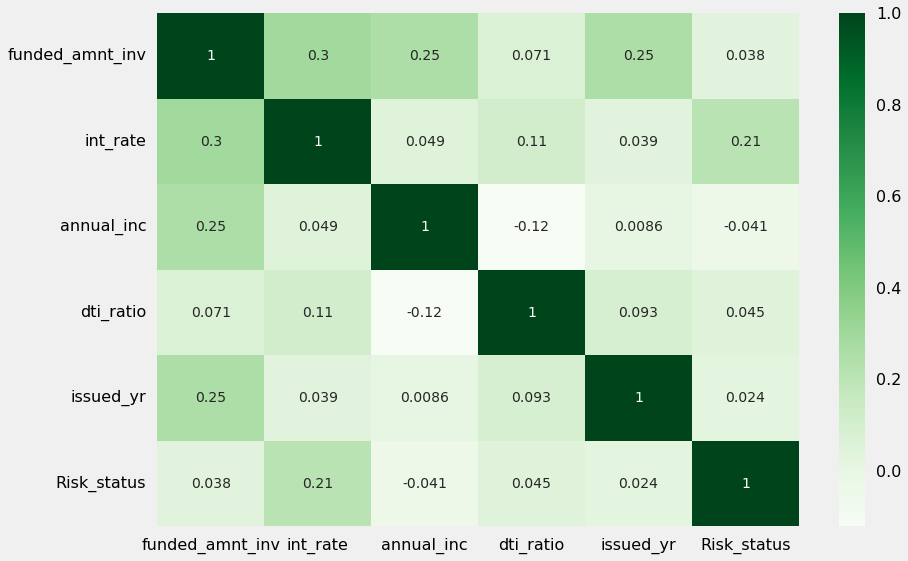

In [33]:
correlation_matrix = LoanDF.corr()
sns.heatmap(correlation_matrix,cmap="Greens", annot=True)
plt.show()

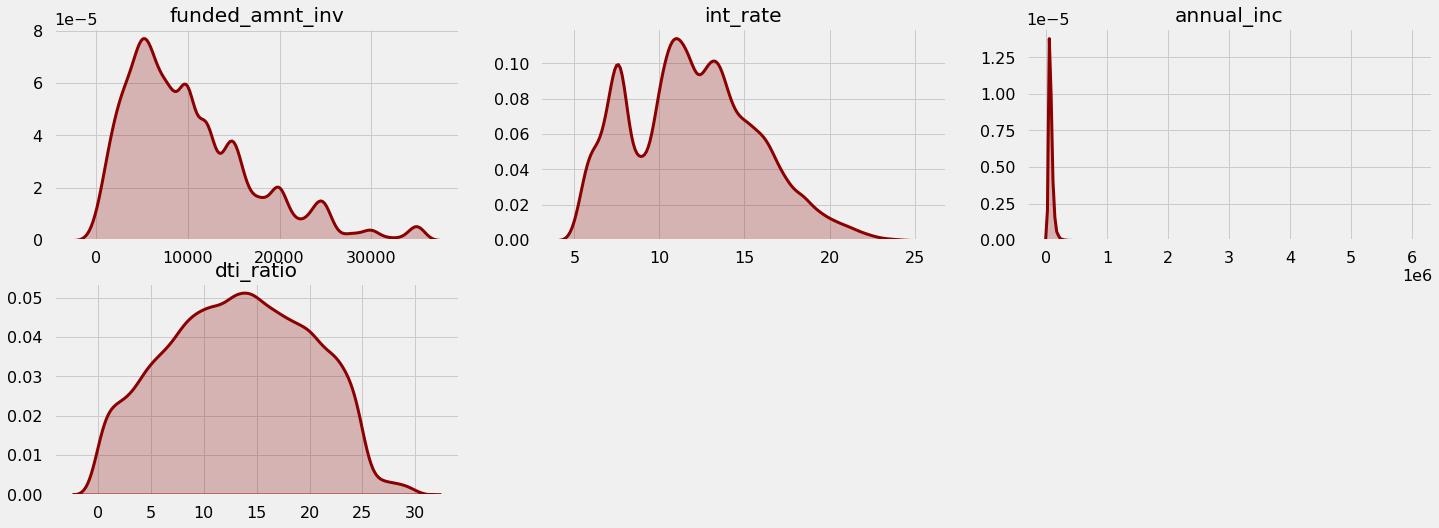

In [34]:
# visualizing the Data skewness
plt.figure(figsize = (22,8))
skewness_cols = ['funded_amnt_inv','int_rate', 'annual_inc', 'dti_ratio']

for i in enumerate(skewness_cols) :
    plt.subplot(2,3, i[0]+1)
    sns.distplot(x=LoanDF[i[1]],hist=False, color='darkred',
             kde_kws = {'shade': True, 'linewidth': 3})
    plt.title(i[1])
    plt.ylabel('')

<a id="outlier"></a>
<h3>   
      <font color = purple >
            <span style='font-family:Georgia'>
             4.7 Identifying the outliers
            </span>   
        </font>    
</h3>

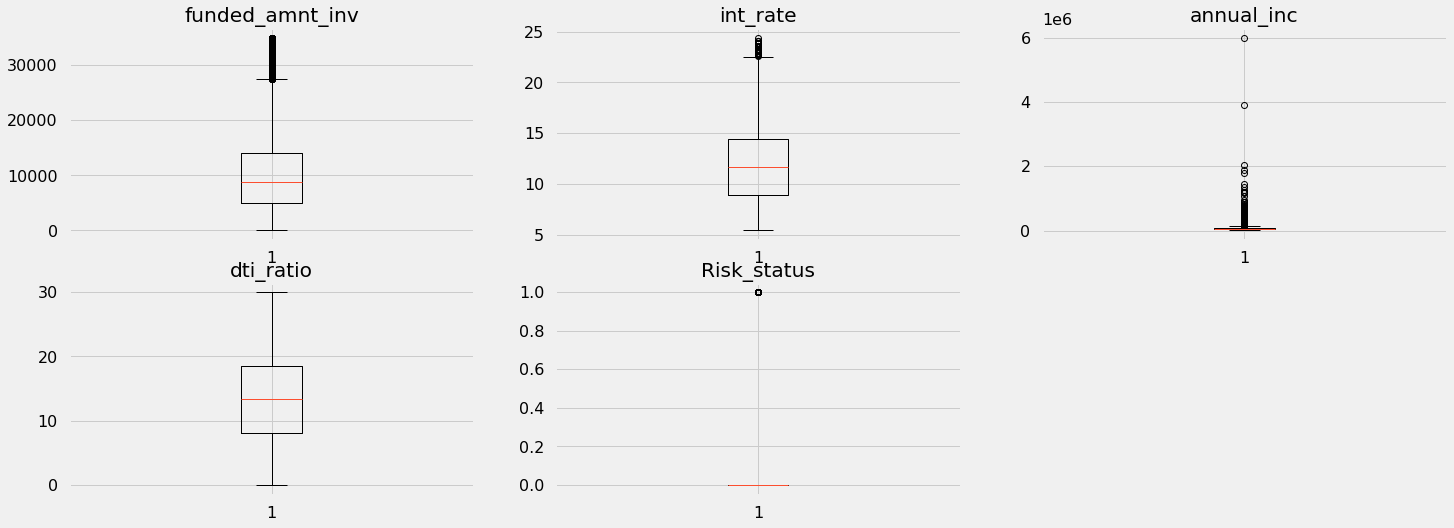

In [35]:
plt.figure(figsize = (22,8))
outlier_detection = ['funded_amnt_inv','int_rate', 'annual_inc', 'dti_ratio','Risk_status']

for i in enumerate(outlier_detection) :
    plt.subplot(2,3, i[0]+1)
    plt.boxplot(x=LoanDF[i[1]])
    plt.title(i[1])
    plt.ylabel('')

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br> 
        <ol>
            <li>funded-amnt_inv have lot of outliers which indicate the loan isssued amount is very high.</li>
            <li>annual_inc has huge number of outliers which indicate that few of the loan applicants have high income when compared to the others.</li>
            <li>dti_ratio has no outliers which means the data available is reliable.</li>
        </ol>        
    </span>    
</div>
<p>
    <span style='font-family:Georgia'>
           We can see the stats for these columns below as well.
    </span>
</p>

<a id="stdval"></a>
<h3>   
      <font color = purple >
            <span style='font-family:Georgia'>
             4.8 Standardize Values
            </span>   
        </font>    
</h3>

In [36]:
from sklearn.preprocessing import StandardScaler
LoanDF[['funded_amnt_inv', 'annual_inc', 'dti_ratio', 'int_rate']] = StandardScaler().fit_transform(LoanDF[['funded_amnt_inv', 'annual_inc', 'dti_ratio', 'int_rate']])


In [37]:
LoanDF[['funded_amnt_inv', 'annual_inc', 'dti_ratio','Risk_status']].describe()

,funded_amnt_inv,annual_inc,dti_ratio,Risk_status
count,3.857700e+04,3.857700e+04,3.857700e+04,38577.000000
mean,2.615173e-15,-6.815250e-17,-4.251696e-16,0.145864
std,1.000013e+00,1.000013e+00,1.000013e+00,0.352975
min,-1.455649e+00,-1.008722e+00,-1.989032e+00,0.000000
25%,-7.436646e-01,-4.481304e-01,-7.706818e-01,0.000000
50%,-2.120347e-01,-1.543181e-01,1.457719e-02,0.000000
75%,5.379066e-01,2.058933e-01,7.923432e-01,0.000000
max,3.528239e+00,9.236096e+01,2.505227e+00,1.000000


In [38]:
#Converting -ve values to +ve values.
LoanDF['annual_inc'] = abs(LoanDF['annual_inc'])
LoanDF['funded_amnt_inv'] = abs(LoanDF['funded_amnt_inv'])
LoanDF['int_rate'] = abs(LoanDF['int_rate'])
LoanDF['dti_ratio'] = abs(LoanDF['dti_ratio'])

In [39]:
LoanDF.describe()

,funded_amnt_inv,int_rate,annual_inc,dti_ratio,issued_yr,Risk_status
count,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000
mean,0.781552,0.815536,0.474918,0.838553,10.309070,0.145864
std,0.623848,0.578714,0.880041,0.544827,0.882658,0.352975
min,0.000359,0.006019,0.000343,0.000409,7.000000,0.000000
25%,0.316474,0.322982,0.174749,0.375055,10.000000,0.000000
50%,0.679576,0.720016,0.370270,0.781172,11.000000,0.000000
75%,1.046258,1.203436,0.585164,1.256224,11.000000,0.000000
max,3.528239,3.377631,92.360957,2.505227,11.000000,1.000000


<a id="analysis"></a>
<h2>   
      <font color = blue >
            <span style='font-family:Georgia'>
            5. Data Analysis
            </span>   
        </font>    
</h2>

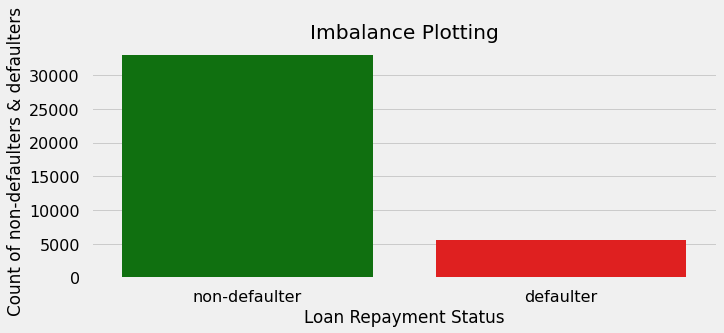

In [40]:
Imbalance = LoanDF["Risk_status"].value_counts().reset_index()

plt.figure(figsize=(10,4))
x= ['non-defaulter','defaulter']
sns.barplot(x,"Risk_status",data = Imbalance,palette= ['g','r'])
plt.xlabel("Loan Repayment Status")
plt.ylabel("Count of non-defaulters & defaulters")
plt.title("Imbalance Plotting")
plt.show()

In [41]:
count_0 = Imbalance.iloc[0]["Risk_status"]
count_1 = Imbalance.iloc[1]["Risk_status"]
count_0_perc = round(count_0/(count_0+count_1)*100,2)
count_1_perc = round(count_1/(count_0+count_1)*100,2)

print('Ratios of imbalance in percentage with respect to Repayer and defaulter data are: %.2f and %.2f'%(count_0_perc,count_1_perc))
print('Ratios of imbalance in relative with respect to Repayer and defaulter data is %.2f : 1 (approx)'%(count_0/count_1))

Ratios of imbalance in percentage with respect to Repayer and defaulter data are: 85.41 and 14.59
Ratios of imbalance in relative with respect to Repayer and defaulter data is 5.86 : 1 (approx)


<a id="oltfunc"></a>
<h3>   
      <font color = purple >
            <span style='font-family:Georgia'>
             5.2 univariate Analysis
            </span>   
        </font>    
</h3>

<AxesSubplot:xlabel='funded_amnt_inv', ylabel='Count'>

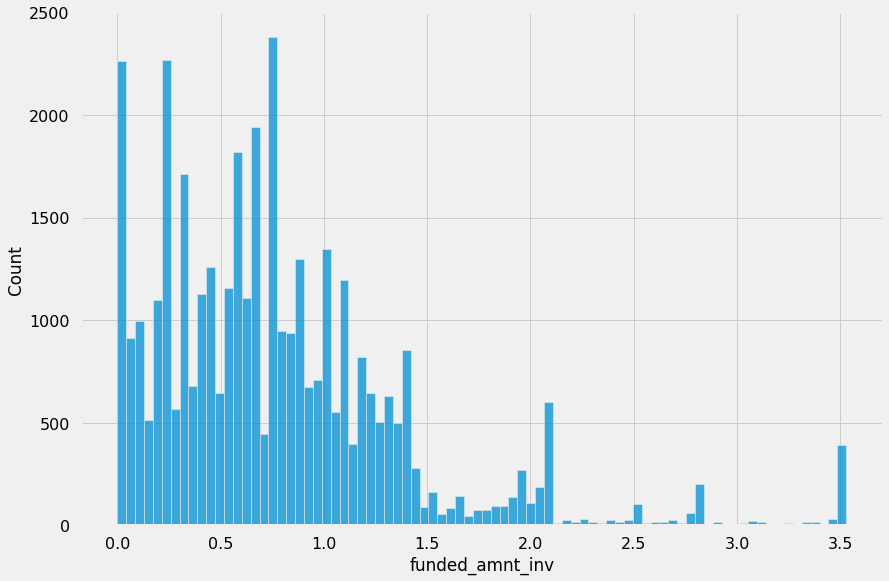

In [42]:
sns.histplot(LoanDF['funded_amnt_inv'])

<AxesSubplot:xlabel='dti_ratio', ylabel='Count'>

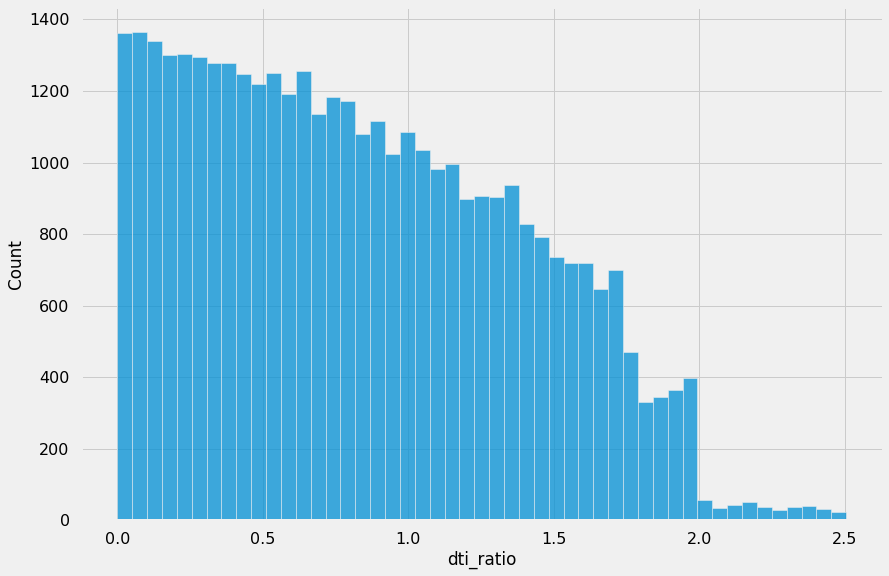

In [43]:
sns.histplot(LoanDF['dti_ratio'])

<h4>   
      <font color = darkgreen >
            <span style='font-family:Georgia'>
             5.3.1 Bivariate Analysis
            </span>   
        </font>    
</h4>

In [44]:
def bivariate(feature,ylog=False,label_rotation=False,horizontal_layout=True):
    temp = LoanDF[feature].value_counts()
    df1 = pd.DataFrame({feature: temp.index,'Number of contracts': temp.values})

    # Calculate the percentage of target=1 per category value
    cat_perc = LoanDF[[feature, 'Risk_status']].groupby([feature],as_index=False).mean()
    cat_perc["Risk_status"] = cat_perc["Risk_status"]*100
    cat_perc.sort_values(by='Risk_status', ascending=False, inplace=True)
    
    if(horizontal_layout):
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
    else:
        fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(20,24))
        
    # 1. Subplot 1: Count plot of categorical column
    # sns.set_palette("Set2")
    s = sns.countplot(ax=ax1, 
                    x = feature, 
                    data=LoanDF,
                    hue ="Risk_status",
                    order=cat_perc[feature],
                    palette=['g','r'])
    
    # Define common styling
    ax1.set_title(feature, fontdict={'fontsize' : 10, 'fontweight' : 3, 'color' : 'Blue'}) 
    ax1.legend(['non-defaulter','Defaulter'])
    
    # If the plot is not readable, use the log scale.
    if ylog:
        ax1.set_yscale('log')
        ax1.set_ylabel("Count (log)",fontdict={'fontsize' : 10, 'fontweight' : 3, 'color' : 'Blue'})   
    
    
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    
    s = sns.barplot(ax=ax2, 
                    x = feature, 
                    y='Risk_status', 
                    order=cat_perc[feature], 
                    data=cat_perc,
                    palette='Set2')
    
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation= 90)
    plt.ylabel('Percent of Defaulters [%]', fontsize=10)
    plt.tick_params(axis='both', which='major', labelsize=10)
    ax2.set_title(feature + " Defaulter %", fontdict={'fontsize' : 15, 'fontweight' : 5, 'color' : 'Blue'}) 

    plt.show();

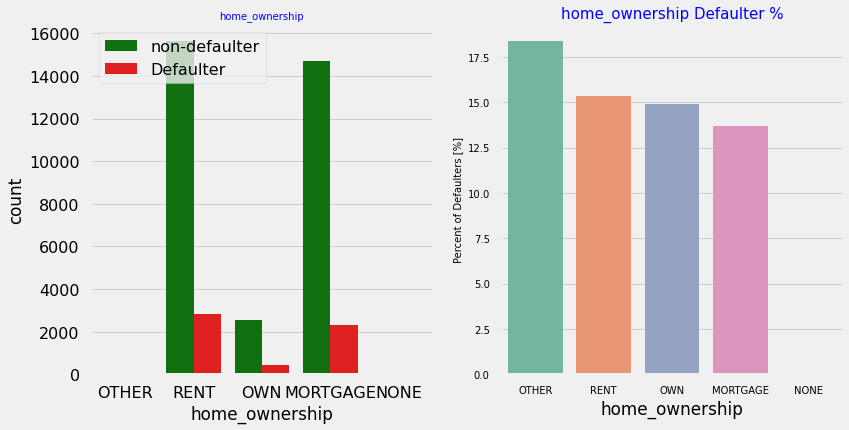

In [45]:
bivariate('home_ownership',False)

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br>Home ownership is not an driving factor to consider. There is a minimal difference for all categories in Home ownership.
    </span>    
</div>

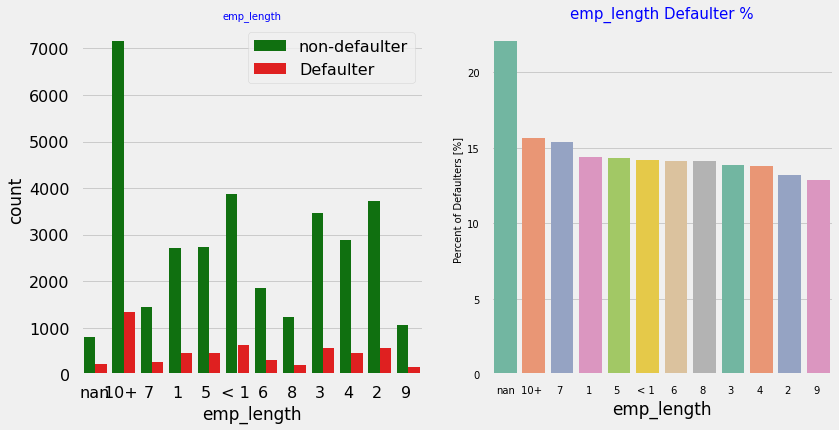

In [46]:
bivariate('emp_length',False)

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br>unemployment applicants are more in defaulter list. Business should consider Emploment is an driving factor while issuing the loan.
    </span>    
</div>

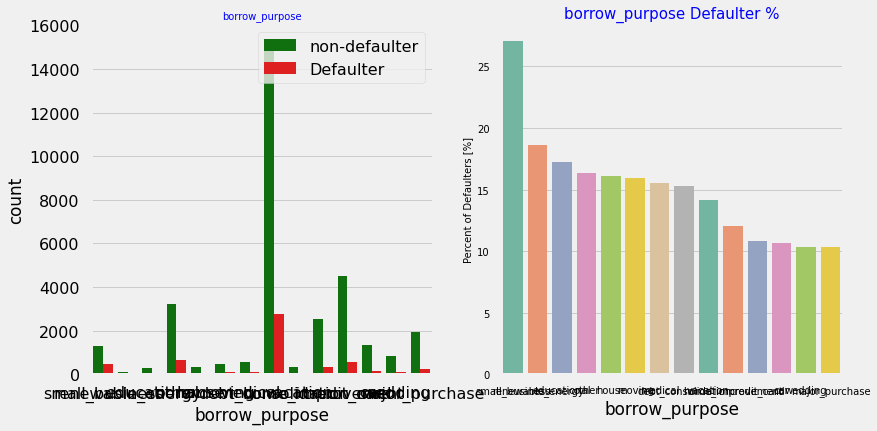

In [47]:
bivariate('borrow_purpose',False)

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br>Borrow puprose is another driving factor that should consider while issuing the loan. Small business applicants are more in defaulter list.
    </span>    
</div>

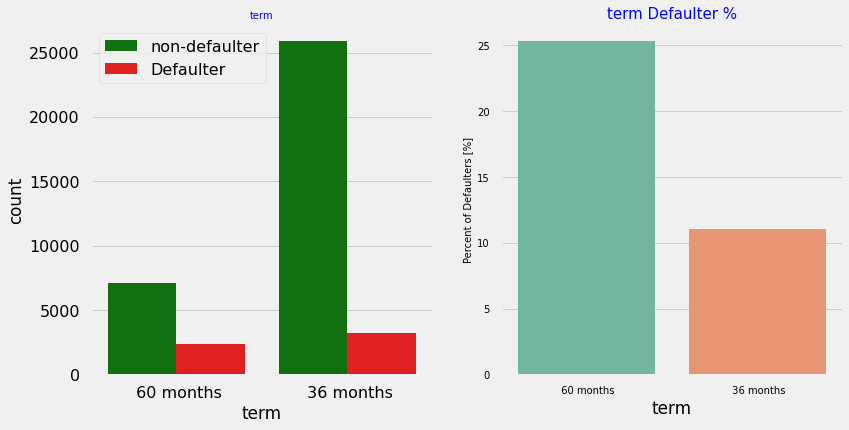

In [48]:
bivariate('term',False)

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br> Less number of repayments of loan is far better and more chances of applicant to become a defaulter when number of payments are high.
    </span>    
</div>

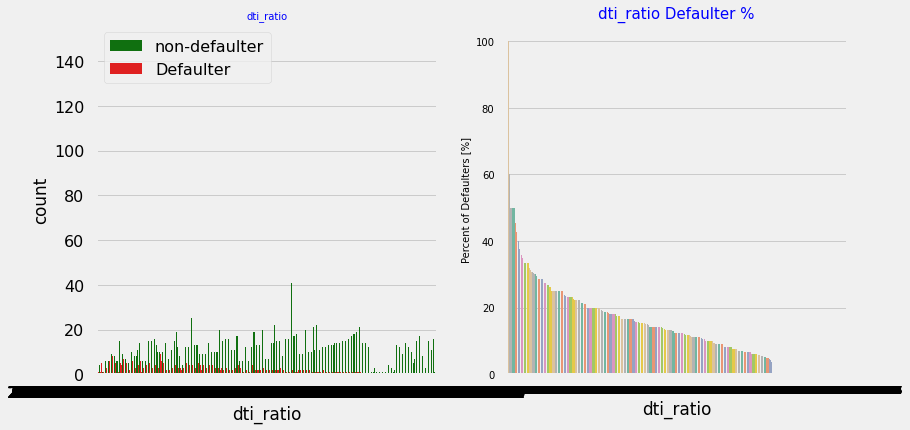

In [49]:
bivariate('dti_ratio',False)

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br>Debt to income ratio is one of the important driving factor that should be considered while issuing the loan. Loan applicants whose dti ratio is high will definitely records to bankruptcy and a defaulter as risky applicant.
    </span>    
</div>

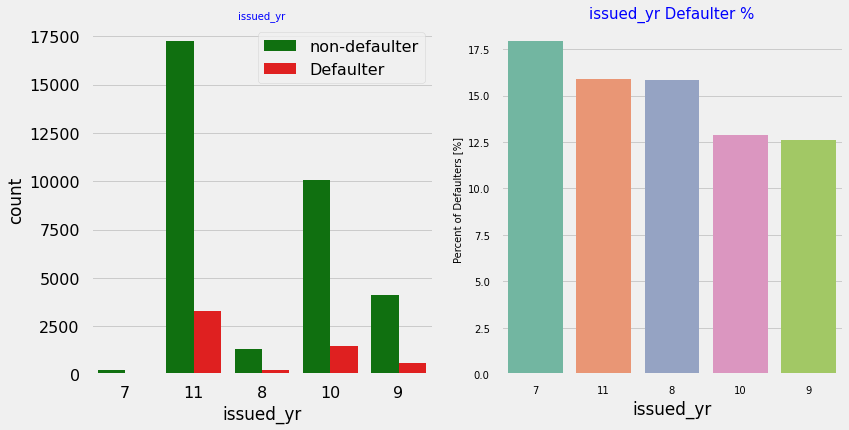

In [50]:
bivariate('issued_yr',False)

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br>issued loans are gradually increased every year and a slight difference on risky applications.
    </span>    
</div>

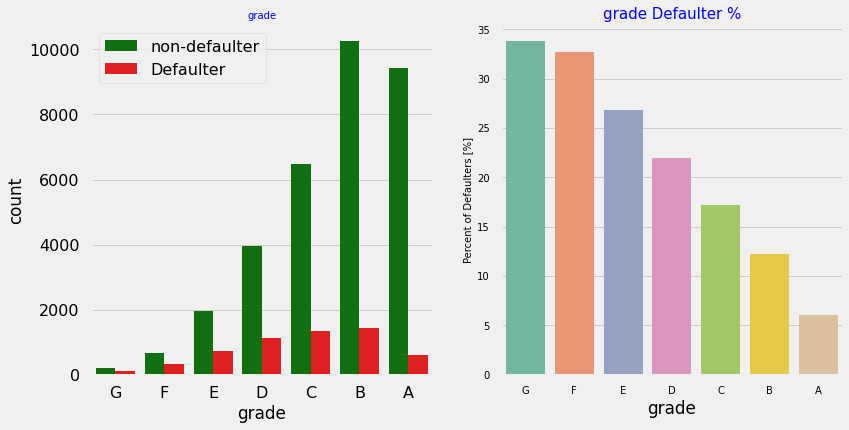

In [52]:
bivariate('grade',False)

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br>Grade of Lenders club is another important driving factor. Grade A reports very less number of risky applicants.
    </span>    
</div>

<a id="conclusion"></a>
<h2>   
      <font color = blue >
            <span style='font-family:Georgia'>
            7. Conclusions
            </span>   
        </font>    
</h2>

<p>
    <span style='font-family:Georgia'>
        After analysing Loan Dataset Driving factors like Debt to income, employment years, lending club grade and borrow purpose are to be considered while issuing the loan.
    </span>
</p>

<div class="alert alert-block alert-success">
    <span style='font-family:Georgia'>
        <b>Decisive Factor whether an applicant will be Repayer: </b> 
        <ol>
            <li>emp_length: unemployment, <3 years has more defaults. </li>
            <li>dti_ratio : High dti has maximum chances to be listed in default.</li>
            <li>grade: Grade A is safer.</li>
            <li>borrow_purpose: Small business applicants are more in defaulters .</li>
        </ol>
    </span>    
</div>

In [61]:
.__version__

'0.11.2'